In [67]:
def warn(*args, **kwargs):
    pass

import warnings
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel as C

warnings.warn = warn

In [102]:
class Customer:
    def __init__(self, name, clicks_a, clicks_b, clicks_c):
        self.name = name
        self.clicks_a = clicks_a
        self.clicks_b = clicks_b
        self.clicks_c = clicks_c
    
    def num_clicks(self, bid):
        return (1.0 - np.exp(self.clicks_a * bid + self.clicks_b * bid**2)) * self.clicks_c
    
    def cum_cost_clicks(self, bid):
        pass
    
    def conversion_probability(self, price):
        pass

In [103]:
def sell_margin(price):
    pass

In [104]:
customers = []
customers.append(Customer('C1', -1.5, 0.5, 100))
customers.append(Customer('C2', -0.5, -1.5, 80))
customers.append(Customer('C3', -5, 0.3, 65))

bids = np.linspace(0.0,1.0,20)
prices = np.linspace(10.0,100.0,1000)

margin = 20

<function matplotlib.pyplot.show(close=None, block=None)>

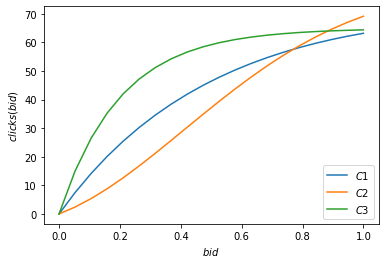

In [105]:
x = np.atleast_2d(bids).T
plt.figure(0)

for C in customers:
    plt.plot(x, C.num_clicks(x), label=r'$' + C.name + '$')

plt.xlabel('$bid$')
plt.ylabel('$clicks(bid)$')
plt.legend(loc='lower right')
plt.show

In [129]:
reward = 0
best_prices = []
best_bids = []
rewards = []

for C in customers:
    best_price = prices[ np.argmax( [C.conversion_probability(price) * sell_margin(price) for price in prices] ) ]
    best_prices.append(best_price)
    
    best_bid = bids[ np.argmax( [C.num_clicks(bid) * C.conversion_probability(best_price) * sell_margin(best_price) - C.cum_cost_clicks(bid) for bid in bids] ) ]
    best_bids.append(best_bid)
    
    reward = C.num_clicks(best_bid) * C.conversion_probability(best_price) * sell_margin(best_price) - C.cum_cost_clicks(best_bid)
    rewards.append(reward)
    
    print('CUSTOMER {}'.format(C.name))
    print('   Best price: {}'.format(best_price))
    print('   Best bid: {}'.format(best_bid))
    
print('Total reward: {}'.format(sum(rewards)))

CUSTOMER C1
   Best price: 100.0
   Best bid: 1.0
CUSTOMER C2
   Best price: 100.0
   Best bid: 1.0
CUSTOMER C3
   Best price: 100.0
   Best bid: 1.0
Total reward: 988888.5520668905
